The purpose of this project is to compute the sentiment of text information - tweets posted in 2015 regarding US airlines - and answer the research question: 
## “What can public opinion on Twitter tell us about the US airlines in 2015?” 


In [1]:
!pip install numpy
!pip install pandas
!pip install lxml
!pip install beautifulsoup4
!pip install sklearn
!pip install nltk

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import lxml.html.clean as chtml
import nltk
import sklearn as sk
import matplotlib.pyplot as plt


from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

# A. DATA CLEANING

In [3]:
data=pd.read_csv('data.txt') 
data

,1.1380000e+00 3.0000000e+00 2.8996400e+02 1.3494890e+03 6.6773800e+03 7.5840000e+00 7.5840000e+00 4.6400600e+02 2.8800000e+02 5.5056300e+02 1.0960000e+00 9.9800000e-01 5.9470000e+00 1.0190000e+00 7.1370000e+00 8.2000000e-02 9.5000000e-01 9.7500000e-01
0,2.0880000e+00 6.0000000e+00 6.9601800e+...
1,3.1440000e+00 9.0000000e+00 8.3792290e+...
2,4.1610000e+00 1.2000000e+01 1.4724395e+...
3,5.1400000e+00 1.5000000e+01 2.1636432e+...
4,6.1750000e+00 1.8000000e+01 2.9792731e+...
5,7.1480000e+00 2.1000000e+01 3.8982180e+...
6,8.2060000e+00 2.4000000e+01 5.0996808e+...
7,9.3000000e+00 2.7000000e+01 7.2763329e+...
8,1.1380000e+00 3.0000000e+00 3.7988000e+...
9,2.0880000e+00 6.0000000e+00 6.9691760e+...


Cleanig the data o prepocessing the data is an important step for sentiment analysis. Having text without symbols, emoticons, numbers, and stop words make the process more accurate. The best idea is to create a specific dictionary to remove the stop words that are not relevant to the arilines analysis. For this assignment, it was provided a file with stop words. The firs trial of the linear regression model was using the file "stopwords"; however, the accuracy of the model on the data test (general tweet 30% of the data) was roughly 70%. Compare with the second trial using the stopr word that comes with the NLTK library.

In [3]:
# Import file general tweets
#general_tweets=pd.read_csv('generic_tweets.txt') #This is the faster option to import the file and make a data frame
general_tweets=pd.DataFrame(general_tweets)

# Rename column class as sentiment in order to use the same tag as in the other data set US Airlines
general_tweets.rename(columns={'class': 'sentiment'}, inplace=True)

#Change type of column text
general_tweets['text']=general_tweets['text'].astype(str)

#Print data frame
general_tweets.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
#Verify the number of rows and columns
general_tweets.shape

(200000, 6)

#### NOTE 1: 
To see if the data is clean after the following processes is useful to count the number of characters at the beginning and compare these values with the number of characterers at the end.

In [5]:
# Count the number of characters in each tweet
general_tweets['len_tweet'] = [len(t) for t in general_tweets.text]
general_tweets.head()

,sentiment,id,date,query,user,text,len_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


## 1. General Tweets Cleaning

Creating fuctions that allow to use the same code for cleaning the next set of data was the approach used in this assignment.
There are an example of what is doing the function in the beginning of each step to better explanation of process, but in the process of cleaning the US airlines tweets these examples where remove since the functions used are the same. 

### 1.1 Cleaning HTML tags and attributes

In [6]:
import re  # import library to rebuilt string
#Create a function to clean HTML tags and attributes by identifiying the beginning and the end of the html line. Example:
            # <head> 
            #<title>Page Title</title> 
            #</head>
def clean_html(text):
    'Text must be string type'
    result = re.sub("<.*?>", "", text)
    return (result)


In [7]:
# There are 200000 tweets that need to be cleaned
# Python works faster with matrices therefore it is an useful step to create an array with the values in the column text
column_text = np.array(general_tweets.text)

In [8]:
# It is neccesary to run the HTML cleaning in 200000 tweets therefore I am using a for loop 
numberrows=len(general_tweets.index)   # Getting the number of columns
numberrows=int(numberrows)         # Change type to integer
for x in range (0, numberrows):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=clean_html(text)         #Call the function clean_html
    column_text[x]=cleantext           #Replace old tweet by tweets without HTLM attributes and tags 
    

In [9]:
# Printing tweets without HTML tags and attributes
column_text

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ...,
       "Okie doke!! Time for me to escape for the North while Massa's back is turned. Be on when I get home folks ",
       'finished the lessons, hooray! ',
       'Some ppl are just fucking KP0. Cb ! Stop asking me laa.. I love my boyfriend and thats it. '],
      dtype=object)

### 1.2 Replace HTML characters by ASCII equivalent

Symbols were present on both data sets; therefore; it is necessary to decode this symbols and transform then to ASCII. For instance &amp represents &. If we do not clean the data that word will be considered in the model decreasing the accuracy of the model

In [10]:
#Example
text = general_tweets.text[343]
text

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [11]:
text = BeautifulSoup(text, 'lxml')
text = text.get_text()
text = ''.join([c for c in text if ord(c) < 128]) # I had some symbol on the airlines data and I use this code to change those to ASCII
text

'@TheLeagueSF Not Fun & Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted & clamped down '

In [12]:
#Create a function to replace HTML characters by ASCII equivalent:
def replace_html(text):
    'Text must be string type'
    result = BeautifulSoup(text, 'lxml') # lmx is part of beatifulsoup that is excellent support for encoding detection 
    result = result.get_text()          # get the result data of decodifing HTML symbols
    result = ''.join([c for c in result if ord(c) < 128]) # I had some symbol in airlines data and I use this code to change those to ASCII
    return (result)

In [13]:
# It is neccesary to run the HTML decodification on 200000 tweets therefore I am using a for loop 
for x in range (0, numberrows):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=replace_html(text)       #Call the function replace_html
    column_text[x]=cleantext           #Replace old tweets by tweets with ASCII codification
    

In [14]:
# Printing tweets without HTML characteres
column_text

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ...,
       "Okie doke!! Time for me to escape for the North while Massa's back is turned. Be on when I get home folks ",
       'finished the lessons, hooray! ',
       'Some ppl are just fucking KP0. Cb ! Stop asking me laa.. I love my boyfriend and thats it. '],
      dtype=object)

### 1.3 Remove URLs

In the first analysis of the data, my idea was to remove URLs that have the format "#http://twitpic.com/2y1zl". This was not enought since users on twitter tend to reduce the number of characters and writte URLs using other formats such as "www.instagram.com". For this reason, I add some other lines to this formula in order to remove all possible URLs. I also used this line of code to remove some information that is not useful for sentimental anlysys such us username "@david15". That information does not add any value to the analysis.

In [15]:
#Example:
text = general_tweets.text[0]
text

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [16]:
text = re.sub('https?://[A-Za-z0-9./]+','',text) # Remove URLs that begin with https and letter and number include in this URL 
text = re.sub(r'@[A-Za-z0-9_]+','',text)     # Remove @handle or users
text = re.sub(r'https?://[^ ]+','',text)     # Remove URLs that begin with https and all the information after
text = re.sub(r'Https?://[^ ]+','',text)     # Remove URLs that begin with capital H
text = re.sub(r'www.[^ ]+','',text)          # Remove URLs that did not begin with https
text = re.sub('http?', '', text)             # Remove http
text = re.sub('http://+', '', text)          # Remove http://
text = re.sub('[//...]', '', text)           # Remove //...
text = re.sub(r"[^\w\d'\s]+",'',text)        # Remore all puctuation except apostrofe
text = re.sub("[^a-zA-Z]", " ", text)        # Remove numbers
text= text.strip()                           # Remove leading and trailing space 
text

'Awww that s a bummer  You shoulda got David Carr of Third Day to do it D'

#### Note 2
In the beginning I ran the URL cleaning using re.sub('https?://[A-Za-z0-9./]+','',text), however, when I looked for items with the word http I found 12 items with specific cases. Therefore, I solve those specific cases by adding more re.sub as is shown above.

In [17]:
#Create a function to remove URls that are always define as http://. Example: 
                 #http://twitpic.com/2y1zl 
def remove_url(text):
    'Text must be string type'
    result = re.sub('https?://[A-Za-z0-9./]+','',text)
    result = re.sub(r'@[A-Za-z0-9_]+','',result)
    result = re.sub(r'https?://[^ ]+','',result)
    result = re.sub(r'Https?://[^ ]+','',result)
    result = re.sub(r'www.[^ ]+','',result)
    result = re.sub('http?:', '', result)
    result = re.sub('http://+', '', result)
    result = re.sub('[//...]', '', result)
    result = re.sub(r"[^\w\d'\s]+",'',result)
    result = re.sub("[^a-zA-Z]", " ", result)
    result= result.strip()
    return (result)

In [18]:
# It is neccesary to run the URL cleaning on 200000 tweets therefore I am using a for loop 
for x in range (0, numberrows):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=remove_url(text)       #Call the function remove_url
    column_text[x]=cleantext        #Replace old tweets by tweet without URLs 
    

In [19]:
# Print column to visualize those changes
column_text

array(['Awww that s a bummer  You shoulda got David Carr of Third Day to do it D',
       'is upset that he can t update his Facebook by texting it and might cry as a result  School today also Blah',
       'I dived many times for the ball Managed to save     The rest go out of bounds',
       ...,
       'Okie doke Time for me to escape for the North while Massa s back is turned Be on when I get home folks',
       'finished the lessons hooray',
       'Some ppl are just fucking KP  Cb  Stop asking me laa I love my boyfriend and thats it'],
      dtype=object)

### 1.4 Make text lowercase

Having the all the data in lowercase make easy to manage the folowing step since we do not need to make any difference between 'A' and 'a' 

In [20]:
#Example
text = general_tweets.text[199999]
text

'Some ppl are just fucking KP0. Cb ! Stop asking me laa.. I love my boyfriend and thats it. '

In [21]:
text=text.lower()
text

'some ppl are just fucking kp0. cb ! stop asking me laa.. i love my boyfriend and thats it. '

In [22]:
#Create a function to make text lower case:
def lower_case(text):
    'Text must be string type'
    result = text.lower()   # make the text lowercase
    return (result)

In [23]:
# It is neccesary to run lower case function on 200000 tweets therefore I am using a for loop 
for x in range (0, numberrows):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=lower_case(text)       #Call the function lowercase
    column_text[x]=cleantext        #Replace the old tweet by the lowercase tweets 
    

In [24]:
# I create a new data frame to add new columns and compare the lenght of the tweet before and after cleaning
clean_general_tweets=pd.DataFrame(general_tweets)
clean_general_tweets['clean_text'] = column_text
# Then I use the lenght of the tweets to show that the tweet is clean
clean_general_tweets['clean_len_tweet'] = [len(t) for t in clean_general_tweets.clean_text]
clean_general_tweets.head()

,sentiment,id,date,query,user,text,len_tweet,clean_text,clean_len_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that s a bummer you shoulda got david ca...,72
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,is upset that he can t update his facebook by ...,106
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,i dived many times for the ball managed to sav...,77
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,no it s not behaving at all i m mad why am i h...,88


As it is presented on the above data frame the number of characterers is different between the raw text and the clean text

### 1.5 Remove stopwords

I generated two models: the first one was using the stop_words file that is part of the assigment and the second used the stop_words set that comes with NLTK. The second model has higger accuracy that the model using the file that is part of the assingment.

In [25]:
#Model 1 using the stop words file provided by the course

#stop_words=pd.read_csv('stop_words.txt',names=['Stop'], header=None)
#stop_words.head()
#clean_general_tweets
#stop_words[stop_words['Stop'].str.contains('did')]
#select column to convert to list here
#stop_words = stop_words["Stop"].tolist()

Finally, I used the stop_words set that comes with the NLTK library

In [26]:
#Import stop words from the NLTK library and create a set
stop_words = set(stopwords.words('english')) 

In [27]:
# Apply the formula to remove stop words and create a new column to save those values
clean_general_tweets['text_no_stopwords'] = clean_general_tweets['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [28]:
clean_general_tweets.head(5)

,sentiment,id,date,query,user,text,len_tweet,clean_text,clean_len_tweet,text_no_stopwords
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that s a bummer you shoulda got david ca...,72,awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,is upset that he can t update his facebook by ...,106,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,i dived many times for the ball managed to sav...,77,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,no it s not behaving at all i m mad why am i h...,88,behaving mad see


There are columns that are not useful for the sentiment analysis and I remove that columns to have a clean data frame with the independent variable and dependent variable that I will use for the model.
1. ID does not add any unformation since it is a number to identify tweets and I am not using that data
2. Username it is not important since this anaylis focus on the text not on the person who wrote it
3. Date is also not important since all these tweets are from 2009

In [29]:
#Drop columns that are not useful for sentimental analysis
clean_general_tweets = clean_general_tweets.drop(columns=['id', 'clean_text','query', 'user', 'text','len_tweet','clean_len_tweet'])
# Create a new clean data frame that will be used in the next steps of this assignment
final_general_tweets=clean_general_tweets.copy()

### 1.6 Counting empty tweets

After processing the data, having and idea of how many cells have no values is part of the analysis

In [30]:
final_general_tweets.isna().sum()

sentiment            0
date                 0
text_no_stopwords    0
dtype: int64

## 2. US Airlines Tweets Cleaning

For cleanig the US Airlines Tweets data set, I used the same formulas used before

In [31]:
# Import file us airlines tweets
airlines_tweets=pd.read_csv('US_airline_tweets.csv') #This is the faster option to import the file and make a data frame
airlines_tweets=pd.DataFrame(airlines_tweets)

#Change type of column text
airlines_tweets['text']=airlines_tweets['text'].astype(str)

#Print data frame
airlines_tweets.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [32]:
#Verify the number of rows and columns
airlines_tweets.shape

(11541, 6)

#### NOTE 3: 
To see if the data is clean after the following processes is useful to count the number of characters at the beginning and compare these values with the number of characterers at the end.

In [33]:
# Count the number of characters in each tweet
airlines_tweets['len_tweet'] = [len(t) for t in airlines_tweets.text]
airlines_tweets.head()

,id,sentiment,negative_reason,user,retweet_count,text,len_tweet
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,72
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,126
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,55
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,135
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",85


### 2.1 Cleaning HTML tags and attributes

In [34]:
# There are 11541 tweets that need to be cleaned
# Python works faster with matrices therefore it is an useful step to create an array with the values in the column text
column_text = np.array(airlines_tweets.text)

In [35]:
# It is neccesary to run the HTML cleaning on 11541 tweets therefore I am using a for loop 
numberrows1=len(airlines_tweets.index)   # Getting the number of columns in the US airlines tweets data
numberrows1=int(numberrows1)             # Change type to integer

for x in range (0, numberrows1):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=clean_html(text)         #Call the function clean_html
    column_text[x]=cleantext           #Replace old tweet by tweets without HTLM attributes and tags 
    

### 2.2 Replace HTML characters by ASCII equivalent

In [36]:
# It is neccesary to run the HTML decodification on 11541 tweets therefore I am using a for loop 
for x in range (0, numberrows1):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=replace_html(text)       #Call the function replace_html
    column_text[x]=cleantext           #Replace old tweets by tweets with ASCII codification
    

### 2.3 Remove URLs

The name of the airline is necessary for the analysis; therefore, I chaanged a line of code in order to keep the @airline but I add another line to remove mentions

In [37]:
#Create a function to remove URls that are always define as http://. Example: 
                 #http://twitpic.com/2y1zl 
def remove_url(text):
    'Text must be string type'
    result = re.sub('https?://[A-Za-z0-9./]+','',text) # Remove URLs that begin with https and letter and number include in this URL 
    result = re.sub(r'#[A-Za-z0-9_]+','',result)     # Remove Mentions
    result = re.sub(r'https?://[^ ]+','',result)     # Remove URLs that begin with https and all the information after
    result = re.sub(r'Https?://[^ ]+','',result)     # Remove URLs that begin with capital H
    result = re.sub(r'www.[^ ]+','',result)          # Remove URLs that did not begin with https
    result = re.sub('http?', '', result)             # Remove http
    result = re.sub('http://+', '', result)          # Remove http://
    result = re.sub('[//...]', '', result)           # Remove //...
    result = re.sub(r"[^\w\d'\s\@]+",'',result)      # Remore all puctuation except apostrofe
    result= result.strip()
    return (result)

In [38]:
# It is neccesary to remove URLs on 11451 tweets therefore I am using a for loop 
for x in range (0,numberrows1):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=remove_url(text)       #Call the function remove_url
    column_text[x]=cleantext        #Replace old tweets by tweet without URLs 
    

### 2.4 Make text lowercase

In [39]:
# It is neccesary to run the lowercase function on 11451 tweets therefore I am using a for loop 
for x in range (0, numberrows1):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=lower_case(text)         #Call the function lowercase
    column_text[x]=cleantext           #Replace the old tweet by the lowercase tweets
    

For the next step I need to find the airline that the tweet is refering to. Therefore, I save all the data before I remove tha @ symbol.

In [40]:
# tweets has the data with @ symbol and I will use this data to identify the airline that is refered on the tweet
tweets =column_text.copy()

Once the data set is save as tweets, I removed @handle and numbers

In [41]:
#Function to remove @handle and numbers
def remove_at(text):
    'Text must be string type'
    result = re.sub(r'@[A-Za-z0-9_]+','',text)
    result = re.sub("[^a-zA-Z]", " ", result)
    return (result)

In [42]:
# It is neccesary to run the the function at removing on 11451 tweets therefore I am using a for loop 
for x in range (0,numberrows1):
    text=column_text[x]                #Get the value from the column text matrix
    cleantext=remove_at(text)       #Call the function remove_at
    column_text[x]=cleantext        #Replace old tweets by tweet without @ and numbers

In [43]:
# I create a new data frame to add new columns and compare the lenght of the tweet beafore and after cleaning
clean_airlines_tweets=pd.DataFrame(airlines_tweets)
clean_airlines_tweets['clean_text'] = column_text
clean_airlines_tweets['clean_len_tweet'] = [len(t) for t in clean_airlines_tweets.clean_text]
clean_airlines_tweets.head()

,id,sentiment,negative_reason,user,retweet_count,text,len_tweet,clean_text,clean_len_tweet
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,72,plus you ve added commercials to the experien...,54
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,126,it s really aggressive to blast obnoxious ent...,105
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,55,and it s a really big bad thing about it,41
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,135,seriously would pay a flight for seats tha...,119
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",85,yes nearly every time i fly vx this ear worm ...,58


### 2.5 Remove stopwords

In [44]:
# Apply formula to the data framw to remove stop words defined before as the stop words that comes with the NKLT library
clean_airlines_tweets['text_no_stopwords'] = clean_airlines_tweets['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

There are columns that are not useful for the sentiment analysis and I remove that columns to have a clean data frame with the independent variable and dependent variable that I will use for the model

In [45]:
#Drop columns that are not useful for sentimental analysis
clean_airlines_tweets = clean_airlines_tweets.drop(columns=['id','user','clean_text','retweet_count','text','len_tweet','clean_len_tweet'])
# Create a new clean data frame that will be used in the next steps of this assignment
final_airlines_tweets=clean_airlines_tweets.copy()

### 2.6 Counting empty tweets

In [46]:
final_airlines_tweets.isna().sum()

sentiment               0
negative_reason      2363
text_no_stopwords       0
dtype: int64

I create to data sets with that have preprocessing text and they will use for the following steps:
1. final_general_tweets
2. final_airlines_tweets

## -----------------------------------------------------------------------------------------------------------------------------------
# B. EXPLORATORY ANALYSIS

In order to get the airline of each tweet it is essential to indicate that more than one name can be mention in one tweet; however, the first tweet that is mentioned (99% of the time) is the one that referts to the airline. For that reason, I decide to get the value of the first name mentioned in the tweet. Additionally, some tweets use names such as @unitedthat that also refers to the airline united. Therefore, a simple algorithm was created to check if the the beginnig of the @word is sililar to an airline name then that tweet is about that airline.

In [47]:
# Getting the name associate with the symbol @
# Example
text = '@VirginAmerica @davud plus youve added commercials to the experience tacky'
result=re.findall(r"@(\w+)", text)
result=result[0]
result

'VirginAmerica'

In [48]:
# Define a fuction to get the name of the airline
def get_airline(text):
    result = re.findall(r"@(\w+)", text)
    return (result)                 

In [49]:
# Define a function to check if the the beginnig of the @word is sililar to an airline name 
#then that tweet is about that airline.
def check_airline(a,b,c,d,e,f,g,text):
    if a in text:
         return (a)
    else:
        if b in text:
            return (b)
        else:
            if c in text:
                return (c)
            else:
                if d in text:
                    return (d)
                else:
                    if e in text:
                        return (e)
                    else:
                        if f in text:
                            return(f)
                        else:
                            if g in text:
                                return (g)
                            else:
                                return ('Not defined')
    

#### Note 4:
The name of airlines mentioned on the USA airlines data set was defined after the first run of this code. The first result showed that the airlines mention on this data set are: 
1. 'virginamerica', 2. 'united', 3. 'usairways', 4. 'americanair', 5. 'southwestair', 6. 'jetblue', 7. 'delta'

In [50]:
# It is neccesary to run the above function on 11451 tweets therefore I am using a for loop 
airline=[]
for x in range (0, numberrows1):
    text=tweets[x]                     #Get the value from the matrix tweets
    name_airline=get_airline(text)     #Call the function get airline
    name_airline=name_airline[0]
    name_airline=check_airline('virginamerica','united','usairways','americanair','southwestair','jetblue','delta',name_airline)
    airline.insert(x, name_airline)    #Save the airlane name in a matrix 

In [51]:
# Creta a new column to save the airline of each tweet
final_airlines_tweets['airline'] = airline

In [52]:
final_airlines_tweets.head()

,sentiment,negative_reason,text_no_stopwords,airline
0,positive,NaN,plus added commercials experience tacky,virginamerica
1,negative,Bad Flight,really aggressive blast obnoxious entertainmen...,virginamerica
2,negative,Can't Tell,really big bad thing,virginamerica
3,negative,Can't Tell,seriously would pay flight seats playing reall...,virginamerica
4,positive,NaN,yes nearly every time fly vx ear worm wont go ...,virginamerica


## Graphs

Graphs are an important part of the analysis and help to better understand the data. Some of the graphs are presented here.

In [53]:
final_general_tweets.head()

,sentiment,date,text_no_stopwords
0,0,Mon Apr 06 22:19:45 PDT 2009,awww bummer shoulda got david carr third day
1,0,Mon Apr 06 22:19:49 PDT 2009,upset update facebook texting might cry result...
2,0,Mon Apr 06 22:19:53 PDT 2009,dived many times ball managed save rest go bounds
3,0,Mon Apr 06 22:19:57 PDT 2009,whole body feels itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,behaving mad see


In [54]:
# Check if text_no_stopwords column is type string
final_general_tweets['text_no_stopwords']=final_general_tweets['text_no_stopwords'].astype(str)
final_general_tweets.sentiment.value_counts()

4    100000
0    100000
Name: sentiment, dtype: int64

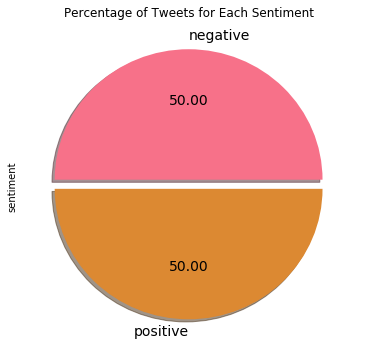

In [55]:
#Plotting percentage of positive and negative tweets in the GENERAL TWEETS DATA SET
colors=sns.color_palette("husl", 10)
pd.Series(final_general_tweets["sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "positive"],explode=[0.05,0.02],
    shadow=True,autopct='%.2f', fontsize=14,figsize=(6, 6),title = "Percentage of Tweets for Each Sentiment")


World Cloud for the words that are present in the General Tweets data set for the NEGATIVE SENTIMENT

In [56]:
# Get text scored as negative sentiment in the data set
dfnegative = final_general_tweets[final_general_tweets['sentiment']== 0]
words1 =' '.join(dfnegative['text_no_stopwords'])
wordcloud1 = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words1)

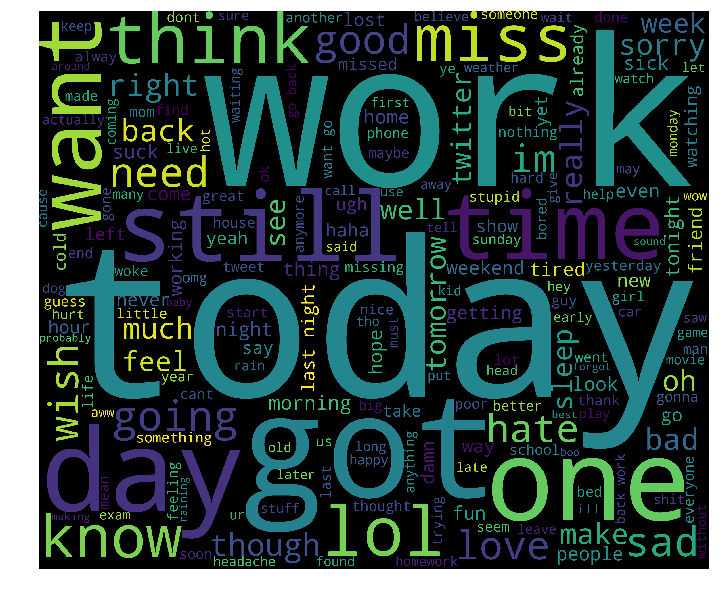

In [57]:
# Plot Word Cloud
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

World Cloud for the words that are present in the General Tweets data set for the POSITIVE SENTIMENT

In [58]:
dfpositive= final_general_tweets[final_general_tweets['sentiment']== 4]
words2 =' '.join(dfpositive['text_no_stopwords'])
wordcloud2 = WordCloud(background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words2)

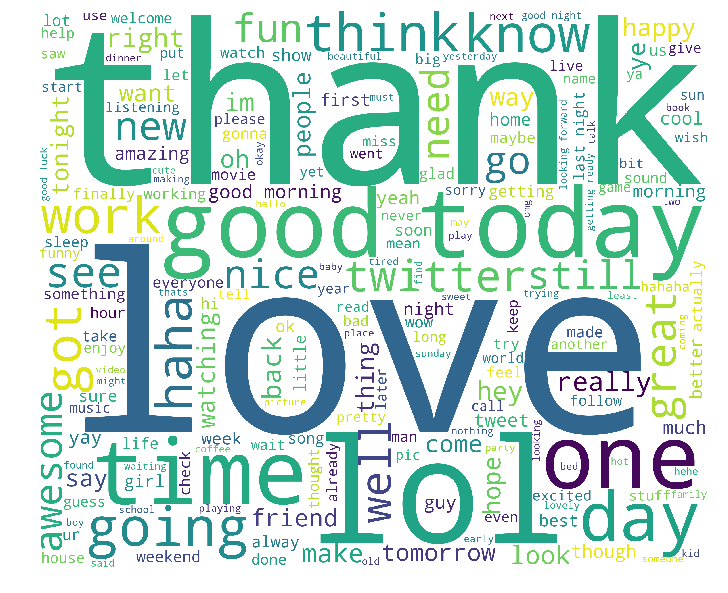

In [59]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Graphs for the US airlines tweets data set

In [60]:
final_airlines_tweets.head()

,sentiment,negative_reason,text_no_stopwords,airline
0,positive,NaN,plus added commercials experience tacky,virginamerica
1,negative,Bad Flight,really aggressive blast obnoxious entertainmen...,virginamerica
2,negative,Can't Tell,really big bad thing,virginamerica
3,negative,Can't Tell,seriously would pay flight seats playing reall...,virginamerica
4,positive,NaN,yes nearly every time fly vx ear worm wont go ...,virginamerica


In [61]:
#Count the number of tweets for each airline
final_airlines_tweets.airline.value_counts()

united           3121
usairways        2525
americanair      2293
southwestair     1755
jetblue          1494
virginamerica     333
Not defined        18
delta               2
Name: airline, dtype: int64

Text(0,0.5,'Number of Tweets')

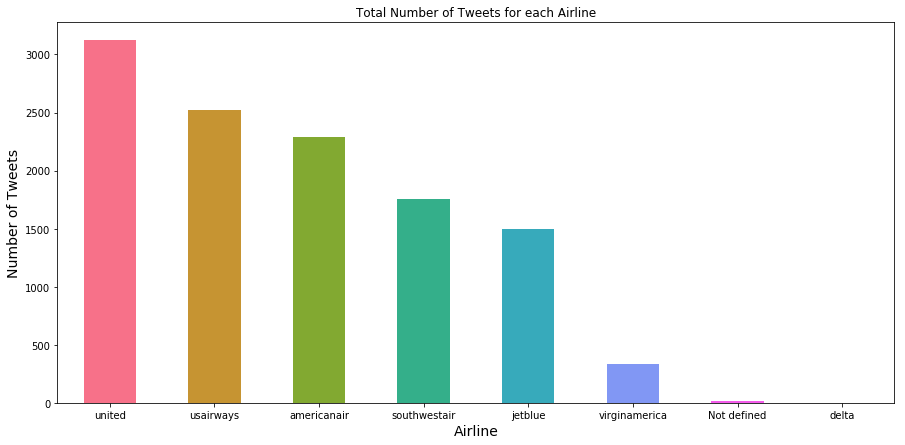

In [62]:
#Plotting the number of tweets that each airline has received
colors=sns.color_palette("husl", 7) 
pd.Series(final_airlines_tweets["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(15,7),fontsize=10,rot = 0, title = "Total Number of Tweets for each Airline")
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

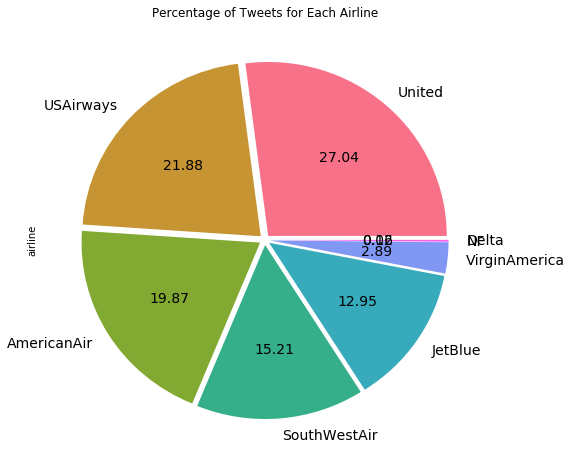

In [63]:
#Plotting percentage of the number of tweets that each airline has received in 2015
colors=sns.color_palette("husl",7)
pd.Series(final_airlines_tweets["airline"]).value_counts().plot(kind="pie",colors=colors,
    labels=["United","USAirways","AmericanAir", "SouthWestAir", "JetBlue", "VirginAmerica", "NF", "Delta"],explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],
    shadow=False,autopct='%.2f', fontsize=14,figsize=(8, 8),title = "Percentage of Tweets for Each Airline")

In [64]:
#counting the number of each type of sentiments 
final_airlines_tweets.sentiment.value_counts()

negative    9178
positive    2363
Name: sentiment, dtype: int64

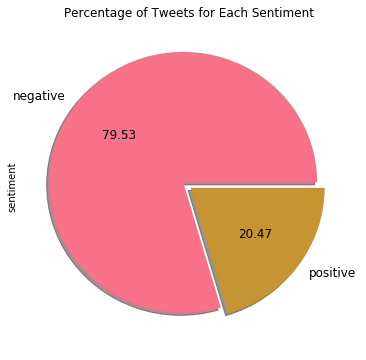

In [65]:
#Plotting percentage of positive and negative tweets
colors=sns.color_palette("husl",7)
pd.Series(final_airlines_tweets["sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "positive"],explode=[0.05,0.02],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Percentage of Tweets for Each Sentiment")

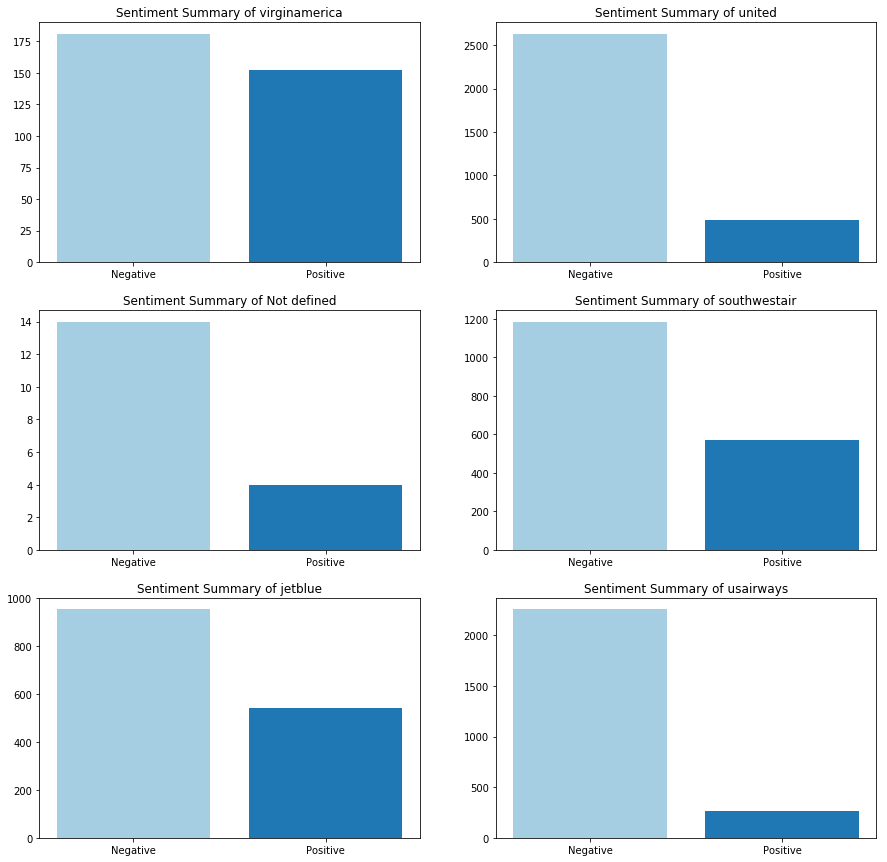

In [66]:
# Define a fuction to count the number of negative and positive tweets for each airline

def plot_airline_sentiment(airline):
    pdf =final_airlines_tweets[final_airlines_tweets['airline']==airline]
    count = pdf['sentiment'].value_counts()
    Index = [1,2]
    color=sns.color_palette("Paired")
    plt.bar(Index,count,width=0.8,color=color)
    plt.xticks(Index,['Negative','Positive'])
    plt.title('Sentiment Summary of' + " " + airline)

#Plot all the figures together in a grid
airline_name = final_airlines_tweets['airline'].unique()
plt.figure(1,figsize=(15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_airline_sentiment(airline_name[i])

In [67]:
#counting the total number of negative reasons
final_airlines_tweets.negative_reason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

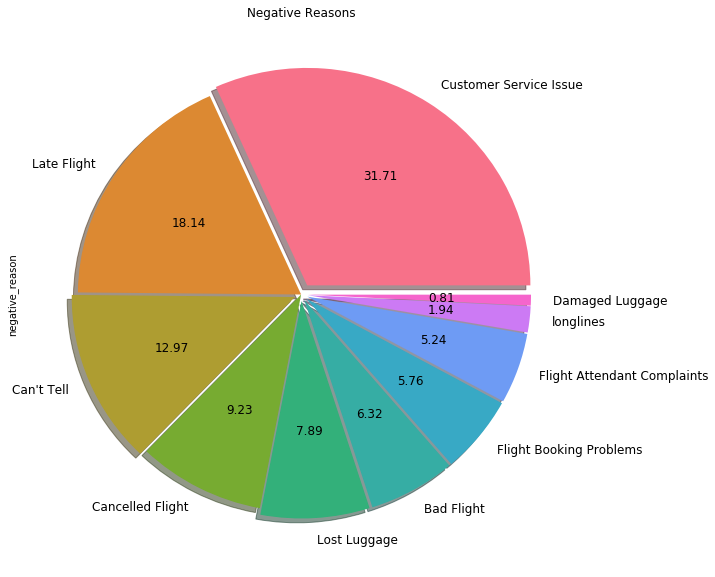

In [68]:
#Plotting negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(final_airlines_tweets["negative_reason"]).value_counts().head(10).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage","Bad Flight","Flight Booking Problems","Flight Attendant Complaints","longlines","Damaged Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.03,0,0.03,0.03,0.03,0.03,0.03,0.03],shadow=True,
                fontsize=12,figsize=(10, 10),title="Negative Reasons")

# ----------------------------------------------------------------------------------------------------------
# C. Model Preparation

In order to perform semantic anylisis on text, we need to use a model. In this case a logistic regression. The first step is to select features or also call FEATURE EXTRACTION. This selection is a key factor to have a high accuracy of the model. I have tried with the folowing options:
1. Counting words 2. Ngrams (1,2), 3. Ngrams (2,3), and limiting the number of features
The theory states that increasinf the number of grams the model should improve but in this case I saw that single words (1 gram) has a higher accuracy. For that reason I decided to use analyser = word option and limite the number of features

In [69]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.metrics import roc_curve, auc

In [70]:
# Bring the final data frame created after cleaning date and removing stopwords. This data frame is named final_general_tweets
final_general_tweets.head()

,sentiment,date,text_no_stopwords
0,0,Mon Apr 06 22:19:45 PDT 2009,awww bummer shoulda got david carr third day
1,0,Mon Apr 06 22:19:49 PDT 2009,upset update facebook texting might cry result...
2,0,Mon Apr 06 22:19:53 PDT 2009,dived many times ball managed save rest go bounds
3,0,Mon Apr 06 22:19:57 PDT 2009,whole body feels itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,behaving mad see


In [71]:
#Defining features and one target value according to the instruction given in the assignment.
X=final_general_tweets['text_no_stopwords']  # features clean tweets without stoptwords 
y=final_general_tweets['sentiment']  # one target 0 = negative, 4 positive sentiment

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors. In this case prepocessing is not necessary since the text was cleaned in the first step. Therefore, this comand will create a matrix of features.

I run this code several times and the best accuracy that I got was using 'word' instead of grams and max features 9510.

In [72]:
vectorizer = CountVectorizer(analyzer='word', max_features=9510)
X_vector= vectorizer.fit_transform(X)
X_vector.shape

(200000, 9510)

The next step is occurrence count and divide the number of occurrences of each word in a document by the total number of words in the document: This new features are called tf for Term Frequencies. Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus. This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”

In [73]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vector)
X_tfidf.shape

(200000, 9510)

In [74]:
#Split the generic tweets randomly into training data (70%) and test data (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.3, random_state=101)

### Train Model

Once we have our features, we can train a classifier to try to predict the category of a tweet. 
The requierement is to use Logistic Regression; however, another method will use as well to see if the new model can be imporved.

In [75]:
model=LogisticRegression()
clf = model.fit(X_train, y_train)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The Logistic Model was created using the training data and it has seen the test data. Therefore, we try to predict the outcome on a new text we need to extract the features using the same feature extracting chain as before.

### Predictions

In [76]:
# Apply the model to the test set
y_predicted = clf.predict(X_test)

In [77]:
# Print a table to show a sample of the true value vs the predicted value

resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':y_predicted
    })
resultsDF.head()

,true,predicted
13588,0,0
29803,0,0
58151,0,0
68799,0,0
58018,0,0


### Metrics

In [78]:
# Calculate the accuracy
print('Accuracy: %.2f%%' % (accuracy_score(y_predicted,y_test)*100))

Accuracy: 76.42%


In [79]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.78      0.74      0.76     30109
          4       0.75      0.79      0.77     29891

avg / total       0.76      0.76      0.76     60000



In [80]:
# Recall
print ('Missed negative Tweets')
Negative = resultsDF[(resultsDF['true'] == 0) & (resultsDF['predicted'] != 0)]
Negative.head(5)

Missed negative Tweets


,true,predicted
27997,0,4
88355,0,4
99059,0,4
44801,0,4
49271,0,4


In [81]:
# Precision
print ('Missed positive Tweets')
Positive = resultsDF[(resultsDF['true'] != 0) & (resultsDF['predicted'] == 0)]
Positive.head(5)

Missed positive Tweets


,true,predicted
193675,4,0
127994,4,0
168114,4,0
102576,4,0
105097,4,0


Producing the confusion matrix

In [82]:
cm = confusion_matrix(y_predicted,y_test)
print(cm)

[[22370  6406]
 [ 7739 23485]]


In [83]:
# Change sentiment values in category: 0 NEGATIVE, 4 POSITIVE
final_general_tweets['sentiment'] = final_general_tweets['sentiment'].astype('category')
sentiment = final_general_tweets['sentiment']
final_general_tweets['sentiment'].cat.categories

Int64Index([0, 4], dtype='int64')

In [84]:
cmDF = pd.DataFrame()

for i, row in enumerate(sentiment.cat.categories):
    temp = {}
    for j, col in enumerate(sentiment.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

       0      4
0  22370   6406
4   7739  23485


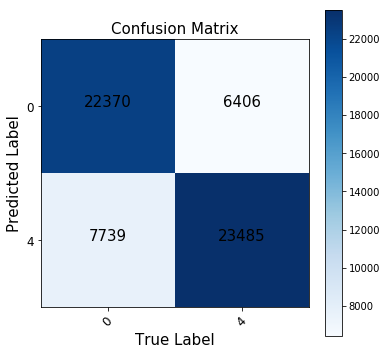

In [85]:
#Print Confusion Matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(sentiment.unique()))
plt.xticks(tick_marks, sentiment.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, sentiment.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'black'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


# ------------------------------------------------------------------------------------------------------------
# BONUS :OTHER MODELS

For this part the same data set is being used; however, I named different just to identify the bonus part.
Pipeline option is used to try two different models and keep the same data set for both

In [86]:
#Defining features and one target value according to the instruction given in the assignment.
Xp=final_general_tweets['text_no_stopwords']  # features clean tweets without stoptwords 
yp=final_general_tweets['sentiment']  # one target 0 = negative, 4 positive sentiment

In [87]:
#Split the generic tweets randomly into training data (70%) and test data (30%)
from sklearn.model_selection import train_test_split
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp,test_size=0.3, random_state=101)

#### Building a Pipeline
This allow us to run diferent model easily by changing the model name and keeping the parameters 

In [88]:
# In this pipeline the data is vectorized and the apply TFIDF count of features that was describe above.
# Logistic regression model with n grams 1,2
from sklearn.pipeline import Pipeline
tweet_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LogisticRegression()),
                     
]) 

In [89]:
tweet_clf.fit(Xp_train,yp_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [90]:
y_predictedp=tweet_clf.predict(Xp_test)

In [91]:
np.mean(y_predictedp == yp_test)            

0.7689166666666667

If I used a model with ngrams (1,2) and 73333 fetures the accuracy of the model on the general tweets is the 77%; however, this model does not perfor that well on the US airlines tweets with an accuracy of 48%. Therefore, I decide to use analyzer = words and a max number of features of 9510

In [92]:
cm = confusion_matrix(y_predictedp,yp_test)
print(cm)

[[23070  6826]
 [ 7039 23065]]


The following code use a SGDC classifier to se what the performance is.

In [93]:
#SGDC Classifier
from sklearn.linear_model import SGDClassifier
tweet_clf_sgdc = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, random_state=101,
                                            max_iter=10, tol=None)),
])
tweet_clf_sgdc.fit(Xp_train,yp_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...y='l2', power_t=0.5, random_state=101, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [94]:
predictedsgdc = tweet_clf_sgdc.predict(Xp_test)
np.mean(predictedsgdc == yp_test)            

0.7294166666666667

In [95]:
cm = confusion_matrix(y_predicted,y_test)
print(cm)

[[22370  6406]
 [ 7739 23485]]


# --------------------------------------------------------------------------------------------------------
# D.  Model Implementation

Once we have or mode using a logistic regression model based on the GENERIC TWEETS data set, the second estep is to  Evaluate the same model on the US airline data. How well do your predictions match the sentiment labelled in the US airline data?

In [96]:
final_airlines_tweets.head()

,sentiment,negative_reason,text_no_stopwords,airline
0,positive,NaN,plus added commercials experience tacky,virginamerica
1,negative,Bad Flight,really aggressive blast obnoxious entertainmen...,virginamerica
2,negative,Can't Tell,really big bad thing,virginamerica
3,negative,Can't Tell,seriously would pay flight seats playing reall...,virginamerica
4,positive,NaN,yes nearly every time fly vx ear worm wont go ...,virginamerica


In order to apply the logistic regression  model on the US ailines data set, the sentiment must be express on the same format. For that reason, I create a new data frame "format_airlines_tweets" to apply a formula that changes negative = 0 and positive = 4

In [97]:
# Create new data frame
format_airlines_tweets=final_airlines_tweets.copy()

In [98]:
# It is necessary to change sentiment values to the same format. 0 = negative, 4 positive
def sentiment_format(text):
    if 'positive' == text:
         return (4)
    else:
        if 'negative' == text:
            return (0)   

In [99]:
# It is neccesary to appy this fucntion on 11451 tweets therefore I am using a for loop 
for x in range (0, numberrows1):
    text=final_airlines_tweets.iloc[x]['sentiment']                    #Get the value from the data frame
    sentiment=sentiment_format(text)                                #Call the function format
    format_airlines_tweets.iloc[x]['sentiment']=sentiment       #Save the airlane name in a matrix 

In [100]:
# Save the new values 
format_airlines_tweets['sentiment']=format_airlines_tweets['sentiment'].astype(int)
format_airlines_tweets.head()

,sentiment,negative_reason,text_no_stopwords,airline
0,4,NaN,plus added commercials experience tacky,virginamerica
1,0,Bad Flight,really aggressive blast obnoxious entertainmen...,virginamerica
2,0,Can't Tell,really big bad thing,virginamerica
3,0,Can't Tell,seriously would pay flight seats playing reall...,virginamerica
4,4,NaN,yes nearly every time fly vx ear worm wont go ...,virginamerica


Define features (X) and target (y) from the data set "format_airlines_tweets". 

In [101]:
#Defining features and one target value according to the instruction given in the assignment.
# "Xu" and "yu" mean feature and target for the usa airlines datas set
Xu=format_airlines_tweets['text_no_stopwords']  # features clean tweets without stoptwords 
yu=format_airlines_tweets['sentiment']  # one target 0 = negative, 4 positive sentiment

In [102]:
# Vectorize feature (Feature Extraction)
# There is a command tha vectorize and apply the tfidf transformation in once but I prefer to use it in two different steps
# for better undesrtading of the process
vectorizer = CountVectorizer(analyzer='word') # I keep the same parameter "analyzer = word" an dthe number of features 
#that was used on the model training step.
Xu_vector= vectorizer.fit_transform(Xu)
Xu_vector.shape

(11541, 9510)

In [103]:
#Apply Tfidf transformation
tfidf_transformer = TfidfTransformer()
Xu_tfidf = tfidf_transformer.fit_transform(Xu_vector)
Xu_tfidf.shape

(11541, 9510)

In [104]:
# Apply "clf.predict" that is the model obtained before in the model preparation stage
y_predictedu = clf.predict(Xu_vector)

In [105]:
# Print a table to show a sample of the true value vs the predicted value

resultsDF = pd.DataFrame({
        'true':yu,
        'predicted':y_predictedu
    })
resultsDF.head()

,true,predicted
0,4,4
1,0,0
2,0,4
3,0,4
4,4,0


### Metrics

In [106]:
# Calculate the accuracy for this model usinf y_ predictedu and yu that is the true value
print('Accuracy: %.2f%%' % (accuracy_score(y_predictedu,yu)*100))

Accuracy: 54.30%


In [107]:
print(classification_report(yu,y_predictedu))

             precision    recall  f1-score   support

          0       0.79      0.57      0.67      9178
          4       0.20      0.42      0.27      2363

avg / total       0.67      0.54      0.59     11541



In [108]:
print ('Missed negative Tweets')
Negative = resultsDF[(resultsDF['true'] == 0) & (resultsDF['predicted'] != 0)]
Negative.head(5)

Missed negative Tweets


,true,predicted
2,0,4
3,0,4
11,0,4
16,0,4
21,0,4


In [109]:
print ('Missed positive Tweets')
Positive = resultsDF[(resultsDF['true'] != 0) & (resultsDF['predicted'] == 0)]
Positive.head(5)

Missed positive Tweets


,true,predicted
4,4,0
5,4,0
8,4,0
9,4,0
10,4,0


In [110]:
cm = confusion_matrix(y_predictedu,yu)
print(cm)

[[5272 1368]
 [3906  995]]


In [111]:
# Change sentiment values in category: 0 NEGATIVE, 4 POSITIVE
#categories_airlines_tweets['sentiment'] = final_general_tweets['sentiment'].astype('category')
sentiment = format_airlines_tweets['sentiment'].astype('category')
sentiment.cat.categories
#format_airlines_tweets['sentiment'].cat.categories

Int64Index([0, 4], dtype='int64')

In [112]:
cmDF = pd.DataFrame()

for i, row in enumerate(sentiment.cat.categories):
    temp = {}
    for j, col in enumerate(sentiment.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

      0     4
0  5272  1368
4  3906   995


# ------------------------------------------------------------------------------------------------------------
# Bonus: Comparison with Other Models

The idea of this step is to show how other models can be used to train a model using the General Tweets data set and compare with the first model. I decide to do it since my prediction on the US airline data set was very low 55%. In order to find a model that can predict the sentiment of the US airlines tweets. I am using the folowing models:

1. RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
2. LinearSVC(),  -------Support Vector Machine
2. MultinomialNB(),
3. LogisticRegression(random_state=101),

In [113]:
# My data set is teh GENERAL TWEETS
#Defining features and one target value according to the instruction given in the assignment.
X=final_general_tweets['text_no_stopwords']  # features clean tweets without stoptwords 
y=final_general_tweets['sentiment']  # one target 0 = negative, 4 positive sentiment

In [114]:
vectorizer = CountVectorizer(analyzer='word')
Xz_vector= vectorizer.fit_transform(X)
Xz_vector.shape

(200000, 93884)

In [115]:
tfidf_transformer = TfidfTransformer()
featuresz = tfidf_transformer.fit_transform(Xz_vector)
labelsz=y
featuresz.shape

(200000, 93884)

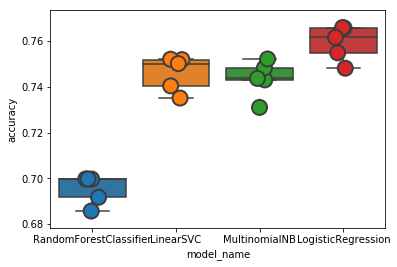

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, featuresz, labelsz, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=15, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

As the figure shows the better model is logistic regression for this data set witouth stop words (NLTK library) 

### Bonus Hyperparameter tuning

Since I know that the best model is Linear Regression, the next step is to find the best parameter to get the higher accuracy.
For this example, I decided to change teh parameter C that is the inverse of regularization strength. C =[0.001, 0.01, 0.1, 1, 10, 100, 1000]. The model above use a C =1 that is by default

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
#Defining features and one target value according to the instruction given in the assignment.
X=final_general_tweets['text_no_stopwords']  # features clean tweets without stoptwords 
y=final_general_tweets['sentiment']  # one target 0 = negative, 4 positive sentiment

In [119]:
vectorizer = CountVectorizer(analyzer='word', max_features=9510)
X_vector= vectorizer.fit_transform(X)
X_vector.shape

(200000, 9510)

In [120]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vector)
X_tfidf.shape

(200000, 9510)

In [121]:
#Split the generic tweets randomly into training data (70%) and test data (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.3, random_state=101)

In [122]:
#Define model and parameters
model=LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clftuning = GridSearchCV(LogisticRegression(penalty='l2', solver ='newton-cg', random_state=101), param_grid)

In [123]:
clftuning = clftuning.fit(X_train, y_train)
clftuning

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [124]:
# Printing the best C
print(clftuning.best_params_)

{'C': 1}


In [125]:
# Apply the model to the test set
y_predictedtuning = clftuning.predict(X_test)

In [126]:
# Calculate the accuracy
print('Accuracy: %.2f%%' % (accuracy_score(y_predictedtuning,y_test)*100))

Accuracy: 76.42%


Afer running the Grid Seacrh it seems that C =1 is the best parameter and that was used in the model preparation.

# ----------------------------------------------------------------------------------------------------------
# D.1 Model for Predicting Negative Reason
Split the negative US airline tweets into training data (70%) and test data (30%). Use the
sentiment labels in the US airline data instead of your predictions from the previous
part.

In [127]:
format_airlines_tweets.head()

,sentiment,negative_reason,text_no_stopwords,airline
0,4,NaN,plus added commercials experience tacky,virginamerica
1,0,Bad Flight,really aggressive blast obnoxious entertainmen...,virginamerica
2,0,Can't Tell,really big bad thing,virginamerica
3,0,Can't Tell,seriously would pay flight seats playing reall...,virginamerica
4,4,NaN,yes nearly every time fly vx ear worm wont go ...,virginamerica


In [128]:
#Select only tweets with negative reason
dat=format_airlines_tweets[format_airlines_tweets.sentiment == 0]
airlines_negative_tweets=pd.DataFrame()
airlines_negative_tweets = dat.reset_index(level=0, drop=True)
airlines_negative_tweets.head()

,sentiment,negative_reason,text_no_stopwords,airline
0,0,Bad Flight,really aggressive blast obnoxious entertainmen...,virginamerica
1,0,Can't Tell,really big bad thing,virginamerica
2,0,Can't Tell,seriously would pay flight seats playing reall...,virginamerica
3,0,Late Flight,sfopdx schedule still mia,virginamerica
4,0,Bad Flight,flew nyc sfo last week fully sit seat due two ...,virginamerica


In [129]:
airlines_negative_tweets.negative_reason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

In [130]:
airlines_negative_tweets.shape

(9178, 4)

Text(0,0.5,'Frecuency')

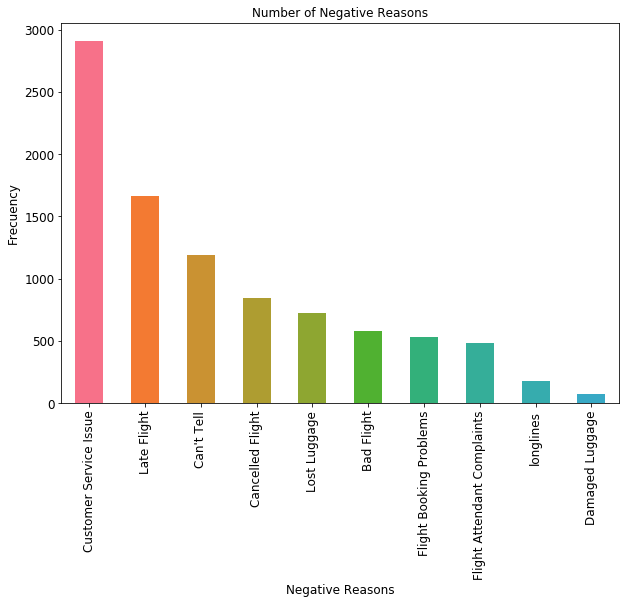

In [131]:
#Plotting the frecuency of each negative reason 
colors=sns.color_palette("husl", 15) 
pd.Series(airlines_negative_tweets["negative_reason"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(10,7),fontsize=12,rot = 90, title = "Number of Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)

We see that the number of negative reasons is imbalanced. Consumers’ complaints are more realted to Customer Service Issues, Late flight, Cannot Tell, and Lost Luggages.
The above graph can be divide in two sections. The first section is realted to main reasons and the second section is related to specific reason that can be put inside the big main reason since there is a close relationship. For instance, CUSTOMER SERVICE ISSUE is related to Flight Attendant Complaints, Damage Luggae and Lost Luggage can be put in a big group call LUGGAGE, late flight, cancelled flight and bad flight can be join in a big group regarding FLIGHT EXPERIENCE


Therefore: 
1. CUSTOMER SERVICE = CUSTOMER SERVICE ISSUE + FLIGHT ATTENDANT + LONGLINES
2. LUGGAGE = LOST LUGGAGE + DAMAGE LUGGAGE
3. FLIGHT ISSUES= LATE FLIGHT + CANCELLED FLIGHT + BAD FLIGHT
4. CAN'T TELL
5. FLIGHT BOOKING PROBLEMS



In [132]:
# It is necessary to create the groups describe before:
def negative_reason(text):
    if 'Customer Service Issue' in text or 'Flight Attendant Complaints' in text or 'longlines' in text:
        return ('Customer Service Issue')
    else:
        if 'Lost Luggage' in text  or 'Damaged Luggag' in text:
            return('Luggage Issue')
        else:
            if 'Late Flight' in text or 'Cancelled Flight' in text or 'Bad Flight' in text:
                return('Flight Issues')
            else:
                if 'Flight Booking Problems' in text:
                    return('Booking Issues')
                else:
                    if "Can't Tell" in text:
                        return('Cannot Tell')

In [133]:
airlines_negative_tweets['negative_reason']=airlines_negative_tweets['negative_reason'].apply(negative_reason)

In [134]:
airlines_negative_tweets.negative_reason.value_counts()

Customer Service Issue    3569
Flight Issues             3092
Cannot Tell               1190
Luggage Issue              798
Booking Issues             529
Name: negative_reason, dtype: int64

Text(0,0.5,'Frecuency')

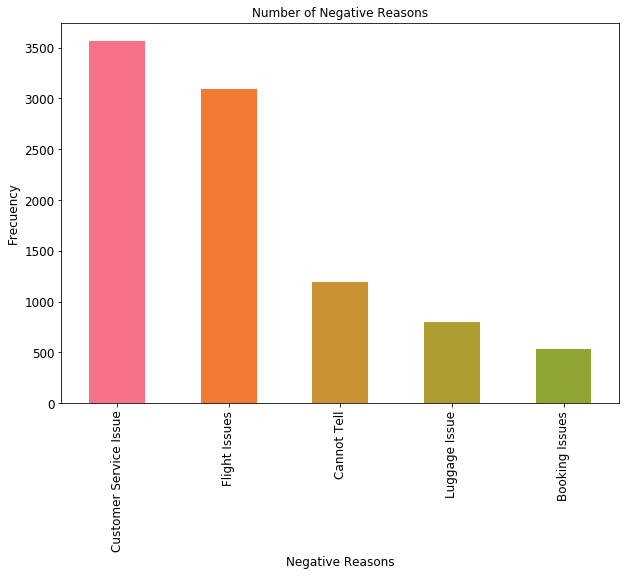

In [135]:
#Plotting the frecuency of each negative reason 
colors=sns.color_palette("husl", 15) 
pd.Series(airlines_negative_tweets["negative_reason"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(10,7),fontsize=12,rot = 90, title = "Number of Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)

### Negative Reason Model

In [136]:
#Defining features and one target value according to the instruction given in the assignment.
Xn=airlines_negative_tweets['text_no_stopwords']  # features clean tweets without stoptwords 
yn=airlines_negative_tweets['negative_reason']  # 5 targets (catergories:Customer Service Issue, Flight Issues,Cannot Tell,luggage Issues, and Booking Issues)

As I mentioned before there is a command to vectorized and apply Tfidf. In this case I will use that command.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2',min_df=10,encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(Xn).toarray()
labels=yn
features.shape

(9178, 1582)

In [138]:
#Split the generic tweets randomly into training data (70%) and test data (30%)
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(features,yn,test_size=0.3, random_state=101)

### Train Model

Once we have our features, we can train a classifier to try to predict the category of a tweet. 
The requierement is to use Logistic Regression.

In [139]:
#Apply logistic regression
model=LogisticRegression()
reason_clf = model.fit(Xn_train, yn_train)
reason_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The Logistic Model was created using the training data and it has seen the test data. Therefore, we try to predict the outcome on a new text we need to extract the features using the same feature extracting chain as before.

### Predictions

In [140]:
# Predict the negative reason 
yn_predicted = reason_clf.predict(Xn_test)

In [141]:
print(classification_report(yn_test,yn_predicted))

                        precision    recall  f1-score   support

        Booking Issues       0.75      0.17      0.28       177
           Cannot Tell       0.55      0.26      0.35       361
Customer Service Issue       0.65      0.79      0.71      1085
         Flight Issues       0.69      0.80      0.74       912
         Luggage Issue       0.76      0.54      0.63       219

           avg / total       0.66      0.67      0.64      2754



In [142]:
resultsDF = pd.DataFrame({
        'true':yn_test,
        'predicted':yn_predicted
    })
resultsDF.head()

,true,predicted
7847,Customer Service Issue,Customer Service Issue
8322,Customer Service Issue,Customer Service Issue
3903,Booking Issues,Customer Service Issue
2128,Flight Issues,Flight Issues
6397,Customer Service Issue,Customer Service Issue


### Metrics

In [143]:
print('Accuracy: %.2f%%' % (accuracy_score(yn_predicted,yn_test)*100))

Accuracy: 66.56%


In [144]:
cm = confusion_matrix(yn_predicted,yn_test)
print(cm)

[[ 30   2   8   0   0]
 [ 12  93  30  24   9]
 [ 94 178 857 141  55]
 [ 41  80 173 734  36]
 [  0   8  17  13 119]]


In [145]:
# Change sentiment values in category: 0 NEGATIVE, 4 POSITIVE
airlines_negative_tweets['negative_reason'] = airlines_negative_tweets['negative_reason'].astype('category')
reason = airlines_negative_tweets['negative_reason']
airlines_negative_tweets['negative_reason'].cat.categories

Index(['Booking Issues', 'Cannot Tell', 'Customer Service Issue',
       'Flight Issues', 'Luggage Issue'],
      dtype='object')

In [146]:
cmDF = pd.DataFrame()

for i, row in enumerate(reason.cat.categories):
    temp = {}
    for j, col in enumerate(reason.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

                        Booking Issues  Cannot Tell  Customer Service Issue  \
Booking Issues                      30            2                       8   
Cannot Tell                         12           93                      30   
Customer Service Issue              94          178                     857   
Flight Issues                       41           80                     173   
Luggage Issue                        0            8                      17   

                        Flight Issues  Luggage Issue  
Booking Issues                      0              0  
Cannot Tell                        24              9  
Customer Service Issue            141             55  
Flight Issues                     734             36  
Luggage Issue                      13            119  


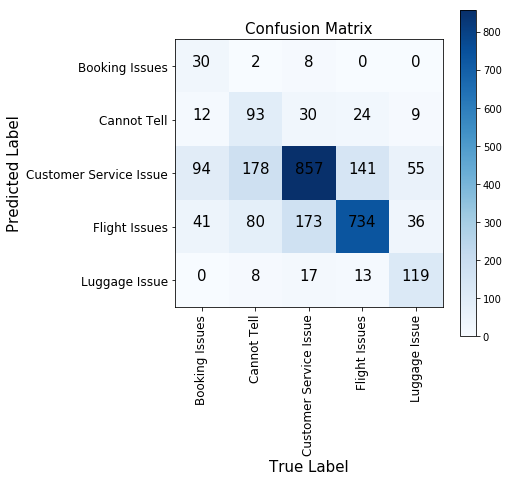

In [147]:
#Print Confusion Matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(reason.unique()))
plt.xticks(tick_marks, reason.cat.categories, rotation=90, fontsize=12)
plt.yticks(tick_marks, reason.cat.categories, fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'black'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


# --------------------------------------------------------------------------------------------------------
# Bonus: Other Methods for Negative Reason Model 

The idea is to find other model that can perform better to predict the negative reason of a tweet.

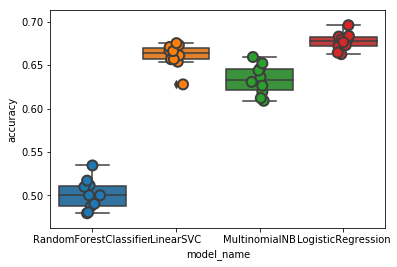

In [148]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=101),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

However, for this data Logistic Regression is still the best option regarding accuracy

# ---------------------------------------------------------------------------------------------------------
# E. Discussion

#### Answer the research question stated above based on the outputs of your first model. Describe the results of the analysis and discuss your interpretation of the results. Explain how each airline is viewed in the public eye based on the sentiment value. 

Based on the analysis of the US airlines tweets data set there are 5 (United, USA Airways, American Airlines, South West Air, Jet Blue, Virgin America, and Delta) airlines that were mentioned by users on their tweets. These airlines were found by the twitter handle denoted by the “@” sign and the username of the airline. The airline that has the majority number of the tweets is United Airlines with 27% and the one with the least number of the tweets is Delta (Figure 1)




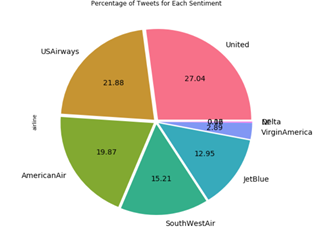



                                                        Figure 1

These tweets can have a negative and positive sentiment that could tell us about the user’s opinion regarding each airline. The sample has 11541 tweets (USA airline tweets) and it cannot be used to make a generalized statement of each airline with respect to another. However, on this data set 79.53% of the tweets showed a negative population opinion about US airlines and just 20.47% with a positive opinion (Figure 2).



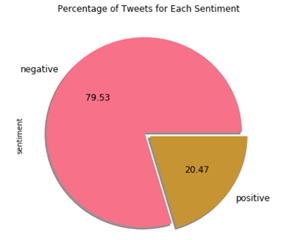



                                                       Figure 2

#### Explain how each airline is viewed in the public eye based on the sentiment value. 

Within this group of airlines, Virgin America airline has almost the same percentage of negative and positive tweets. Comparing the percentage difference between the two sentiments of tweets, Virgin America, stands out as the “best” of them. On the other had, United and USA Airways, show a bigger percentage of negative tweets over positive ones. Therefore, United and USA Airways have the worst negative user’s opinion in this data set. It is important to mention that none of the airlines had a bigger percentage of positive tweets over negative ones, nonetheless, Virgin America could be considered the top airline as it has the almost the same percentage of positive and negative tweets, as previously mentioned.  The bar graph depicted in Figure 3 shows the number of negative and positive tweets for each airline to support the analysis mentioned above.


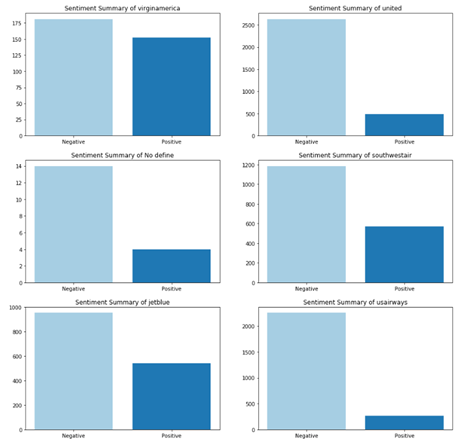

                                                        Figure 3


Regarding the cause for the negative image of the airlines in the USA, the most common issue that users mentioned was Customer Service Issues with 31.71% of the negative tweets, compared with the other causes with a percentage of less than 19%. The least common issue is Damage of Luggage with only 0.81%. Other important causes are late and cancelled flight with a 18.14% and 9.23% respectively (Figure 4). The cause “Can’t Tell” in the figure is significant to be highlighted it is the third largest proportion of tweets with 12.97%. The cause serves to show the importance of categorizing other issues in a more specific manner to provide more tailored and detailed feedback for the airline to improve.
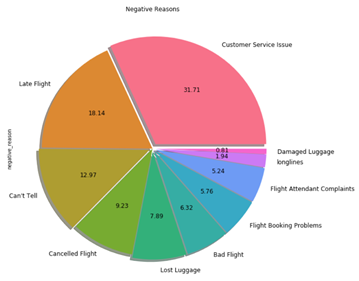
                                                       
                                                       Figure 4

For your second model, if there are any tweets for which the model failed to predict the correct negative reason, explain why. Justify your explanation with a few examples from the test sets.

#### Answer the research question stated above based on the outputs of your first model.
In summary, what the public opinion on Twitter can tell us about the US airlines in 2015 is that in general airlines in the USA have a negative image based on the negative users’ opinions and the main cause is their Customer Service. 


Analysing the linear regression model applied on the General Tweets data set, the accuracy of the model on the test set (30% of the data) is approximately 77% using n grams 1 (analyzer = ‘word’), which makes it to be an acceptable model since the data set has 50% of negative and positive sentiment tweets. The main reason to have this result could be the misspelling of words and the very common use of hashtags on tweeter that makes it more difficult to remove words that do not add any value to the sentiment analysis. 

The accuracy of the same model applied to the USA data set has an accuracy of an approximately 55% without any hyperparameter optimization. The main cause to have this accuracy could be that words on the general tweets data set are not closely related with words that are used to refer to the specific issues on the airline tweets. A 55% accuracy is not an acceptable model if we compare this value with the fact that 79% of the US airline tweets are negative tweets and this model can only predict 55%.

Based on this model, 5272 tweets out of 11541 tweets were predicted as negative when they in fact were negative and 995 tweets were predicted postive when they were in fact positive. This values give us the same idea compare with the true opinion stated above (analysis of data and graphs). In other words, the model state that USERS HAVE A NEGATIVE OPINION about US airlines in 2015 as well.

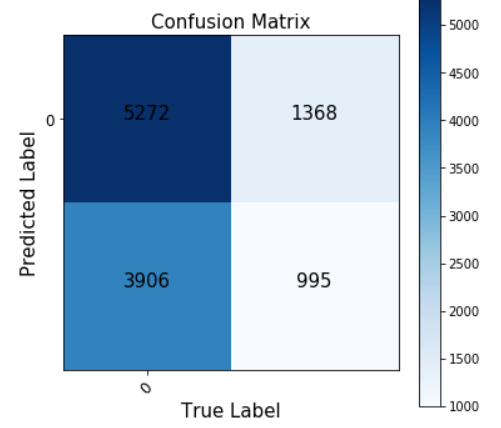



#### For your second model, if there are any tweets for which the model failed to predict the correct negative reason, explain why. Justify your explanation with a few examples from the test sets.
 
The second model has an accuracy of approximately 67% on the test set (2753 tweets). The data set has 11541 tweets and 9178 tweets have a negative sentiment. On that 9178 negative tweets 3569 tweets are related to customer service that is approximately 40% of the tweets, 3092 tweets refer to the flight experience (late, cancelled, or bad flight) that represents 34% of the total. In contrast, only 26% are related to the other factors (12% cannot tell, 6% booking problems, and 8% luggage issues). This fact produces a model that has a bias to predict the categories with more significance on the data set (Customer Service Issues and Flight Issues). In order words, if the tweet is referring to booking issues it is more probable to be predicted as Customer Service or Flight Issues.
This effect is shown in the Cofusion Matrix where Customer Service and Flight Issues have the best accuracy.

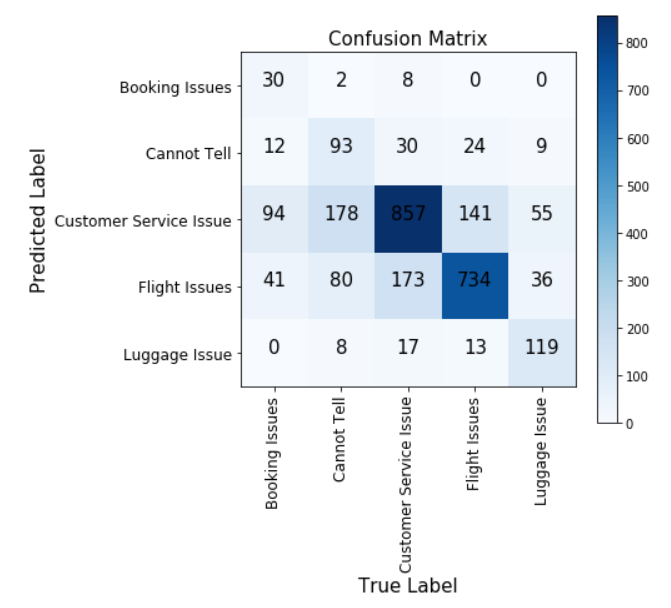

In [149]:
booking = resultsDF.loc[resultsDF['true'] == 'Booking Issues']
booking.head(10)

,true,predicted
3903,Booking Issues,Customer Service Issue
4814,Booking Issues,Flight Issues
8987,Booking Issues,Customer Service Issue
4977,Booking Issues,Flight Issues
1343,Booking Issues,Booking Issues
8075,Booking Issues,Flight Issues
1881,Booking Issues,Flight Issues
8876,Booking Issues,Customer Service Issue
6654,Booking Issues,Customer Service Issue
9041,Booking Issues,Flight Issues


The table above shows that most of the booking issues are predicted as either Customer Service or Flight Issues

#### Suggestions to Improve models
The applied logistic regression approaches presented above are text classification problems that solve the problem by training classifiers on the labeled data set. Therefore, the text and what the text refers to are essential factors to create an acceptable model. In order to improve these models, the following suggestions could be implemented.
1.	For the first model, it needs to be trained using significant data that must be collected from sources that refer to airlines and their issues. Those sources will have words that better describe the users’ opinion regarding the airlines. Therefore, the bag of words (features) that will model the logistic regression will allow a better prediction on the USA airline tweets data set. Using the general tweets data set creates a model with features that are not closely related to the users' opinion about airlines. Also, featuring engineering can be a great tool in the case that data is not available, and the general tweets data set needs to be used.
2.	On the second model, it is recommendable to normalize the data set (normalized corpus). Words are the crucial part of any classification technique. However, these words are often used with different variations in the text depending on their grammar and the spelling on tweeter varies depending on the user. Tweeter has only 140 characters; therefore; users tend to use contractions that sometimes do not make sense. For that reason, it is recommendable to normalize the terms to their root forms, known as Lemmatization. Moreover, the categorization of the tweets on the training data must be accurate. For this assignment, there are tweets with words such as “guess” that refers to customer service, but they are categorized as bad flight.

In conclusion, for a classification problem, it is important to choose the test and training data set carefully. For a variety of features to act in the classification algorithm, domain knowledge plays an integral part. Using an exhaustive Stopword List and eliminating features with extremely low frequency will produce a better accuracy on the model prediction.
